In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Predicting Living Situation: Village or City

In [22]:
personality_questions = pd.read_csv('cleaned_youngpeople_data.csv')
personality_questions.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5,3,2,1,2,2,1,5,5,1,...,20,163,48,1,female,right handed,college/bachelor degree,no,village,block of flats
1,4,4,2,1,1,1,2,3,5,4,...,19,163,58,2,female,right handed,college/bachelor degree,no,city,block of flats
2,5,5,2,2,3,4,5,3,5,3,...,20,176,67,2,female,right handed,secondary school,no,city,block of flats
3,5,3,2,1,1,1,1,2,2,1,...,22,172,59,1,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5,3,4,3,2,4,3,5,3,1,...,20,170,59,1,female,right handed,secondary school,no,village,house/bungalow


In [23]:
personality_questions.groupby('House - block of flats').count()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town
House - block of flats,,,,,,,,,,,,,,,,,,,,,
block of flats,583,583,583,583,583,583,583,583,583,583,...,583,583,583,583,583,583,583,583,583,583
house/bungalow,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,394,394,394,394,394,394


In [24]:
personality_questions["Education"].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

In [25]:
cleanup_education = {"Education": {'currently a primary school pupil': 1, 'primary school': 2,
                                  'secondary school': 3, 'college/bachelor degree': 4,
                                  'masters degree': 5, 'doctorate degree': 6}}

In [26]:
personality_questions = personality_questions.replace(cleanup_education)

In [27]:
living_situation_questions = personality_questions.drop(['Smoking', 'Alcohol', 'Lying', 'Punctuality', 'Only child',
                                                            'Internet usage', 'Gender', 'Left - right handed',
                                                             'Village - town'], axis='columns')

In [324]:
X_train, X_test, y_train, y_test = train_test_split(living_situation_questions.drop(['House - block of flats'], axis='columns'),
                                                    living_situation_questions['House - block of flats'], random_state=2,
                                                    test_size=0.2)

In [325]:
model = LogisticRegression(random_state=42)

In [326]:
model.fit(X_train, y_train)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [329]:
# Look at parameters used by our current forest
print('HyperParameters currently in use:\n')
pprint(model.get_params())

HyperParameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [328]:
model.score(X_test, y_test)

0.5969387755102041

In [330]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[81, 43],
       [36, 36]])

In [331]:
y_test.value_counts()

block of flats    124
house/bungalow     72
Name: House - block of flats, dtype: int64

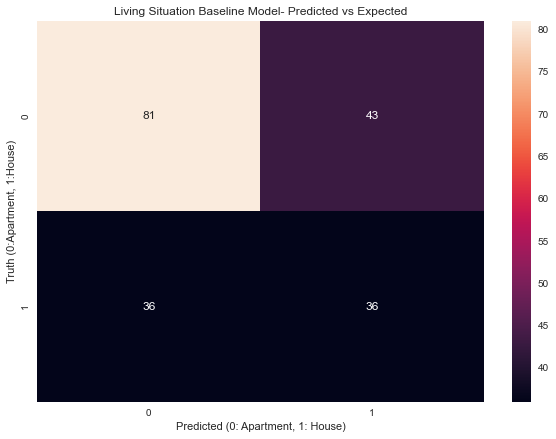

In [334]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted (0: Apartment, 1: House)')
plt.ylabel('Truth (0:Apartment, 1:House)')
plt.title('Living Situation Baseline Model- Predicted vs Expected')
#plt.savefig("livingsituationheatmap.png")
plt.show()

## Feature Selection

We can plot the feature importance of the columns from our dataset.

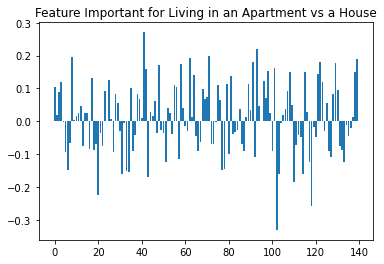

In [52]:
importance = model.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Important for Living in an Apartment vs a House')
plt.show()

Using [Yellowbrick](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) for a better visual of some of the top features.

In [60]:
model.coef_

array([[ 0.10338039,  0.01979356,  0.0888068 ,  0.1203911 , -0.00143529,
        -0.09384436, -0.14915115, -0.06498375,  0.19582677,  0.00447873,
         0.01757239,  0.02524911,  0.04792196, -0.07472506,  0.02512148,
         0.02540729, -0.08332172,  0.13260681, -0.08747046, -0.06923522,
        -0.22578964, -0.03523652, -0.07622705,  0.09235148,  0.00072273,
         0.12498442,  0.00558702, -0.0931597 ,  0.08284027,  0.05707804,
        -0.03054972, -0.16018383, -0.00504377, -0.15231904, -0.15351242,
         0.10261234, -0.09180543, -0.04266674,  0.08266302,  0.06760873,
         0.01135621,  0.27105183,  0.16058905, -0.16963226,  0.02790577,
         0.01665579,  0.06049456, -0.03662306,  0.17177183, -0.02592082,
        -0.03675397, -0.12510677,  0.03975989,  0.02521325, -0.03786116,
         0.10997388,  0.1046828 , -0.11570146,  0.17341337,  0.03970745,
        -0.01361622, -0.02843436,  0.19386101,  0.01248777,  0.13976559,
        -0.04433511, -0.08995228, -0.06152602,  0.0

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


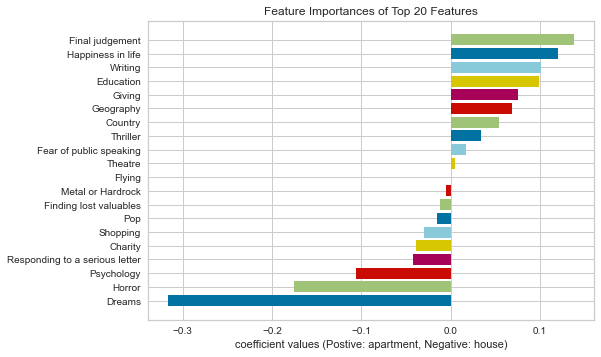

In [320]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model, relative=False, topn=20)
viz.fit(X_train, y_train)
plt.title("Feature Importances of Top 20 Features")
plt.xlabel("coefficient values (Postive: apartment, Negative: house)")
#plt.savefig("livingsituationfeatureimportant.png")
plt.show()

An even better indicator of what parameters are most important can be sought out using RFECV—recursive feature elimination with cross validation.

In [220]:
from sklearn.feature_selection import RFE

rfe = LogisticRegression()
trans = RFE(rfe, n_features_to_select=20)
living_X_trans = trans.fit_transform(X_train, y_train)
columns_retained_RFE = living_situation_questions.iloc[:, 1:].columns[trans.get_support()].values

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [221]:
columns_retained_RFE

array(['Country', 'Pop', 'Metal or Hardrock', 'Horror', 'Thriller',
       'Psychology', 'Geography', 'Writing', 'Shopping', 'Theatre',
       'Flying', 'Fear of public speaking', 'Final judgement', 'Giving',
       'Dreams', 'Charity', 'Responding to a serious letter',
       'Happiness in life', 'Finding lost valuables', 'Education'],
      dtype=object)

In [222]:
RFE_personality = personality_questions[['Country', 'Pop', 'Metal or Hardrock', 'Horror', 'Thriller',
       'Psychology', 'Geography', 'Writing', 'Shopping', 'Theatre',
       'Flying', 'Fear of public speaking', 'Final judgement', 'Giving',
       'Dreams', 'Charity', 'Responding to a serious letter',
       'Happiness in life', 'Finding lost valuables', 'Education','House - block of flats']]
RFE_personality.head()

,Country,Pop,Metal or Hardrock,Horror,Thriller,Psychology,Geography,Writing,Shopping,Theatre,...,Fear of public speaking,Final judgement,Giving,Dreams,Charity,Responding to a serious letter,Happiness in life,Finding lost valuables,Education,House - block of flats
0,2,5,1,4,2,5,3,2,4,2,...,2,5,4,4,2,3,4,3,4,block of flats
1,1,3,4,2,2,3,4,1,3,2,...,4,1,2,3,1,4,4,4,4,block of flats
2,3,3,3,3,4,2,2,5,4,5,...,2,3,5,1,3,4,4,3,3,block of flats
3,1,2,1,4,4,4,4,3,4,1,...,5,1,1,3,3,3,2,1,4,house/bungalow
4,2,5,1,4,4,2,2,1,3,2,...,3,5,3,3,3,3,3,2,3,house/bungalow


In [315]:
X_train, X_test, y_train, y_test = train_test_split(RFE_personality.drop(['House - block of flats'], axis='columns'),
                                                    RFE_personality['House - block of flats'], random_state=2,
                                                    test_size=0.2)

In [316]:
RFEmodel = LogisticRegression()

In [317]:
RFEmodel.fit(X_train, y_train)

LogisticRegression()

In [318]:
RFEmodel.score(X_test, y_test)

0.6785714285714286

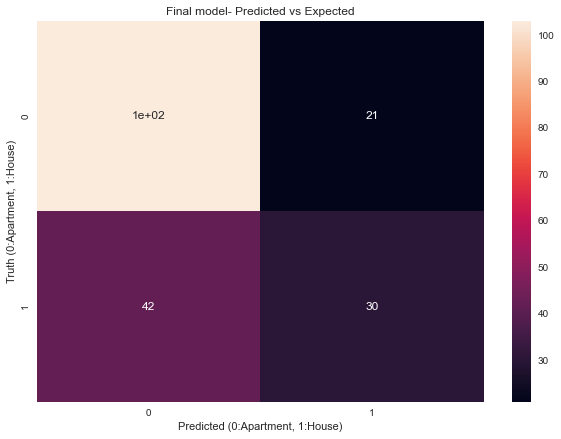

In [323]:
y_predicted = RFEmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted (0:Apartment, 1:House)')
plt.ylabel('Truth (0:Apartment, 1:House)')
plt.title('Final model- Predicted vs Expected')
#plt.savefig("livingsituationheatmap2.png")
plt.show()

Our model had an 8% increase in accuracy with feature selection alone. What's most notable in the significant decrease in parameters needed for predicting with 68% accuracy. Only 20 of the 120 features were needed to predict whether someone lives in an apartment or house.

# Predicting Value of Appearence

In [412]:
appearance_questions = personality_questions.drop(['Smoking', 'Alcohol', 'Lying', 'Punctuality', 'Only child',
                                                            'Internet usage', 'Gender', 'Left - right handed',
                                                             'Village - town', 'House - block of flats'], axis='columns')

In [417]:
X_train, X_test, y_train, y_test = train_test_split(appearance_questions.drop(['Appearence and gestures'], axis='columns'),
                                                    appearance_questions['Appearence and gestures'], 
                                                    test_size=0.2)

In [418]:
model = LogisticRegression()

In [419]:
model.fit(X_train, y_train)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [420]:
model.score(X_test, y_test)

0.39285714285714285

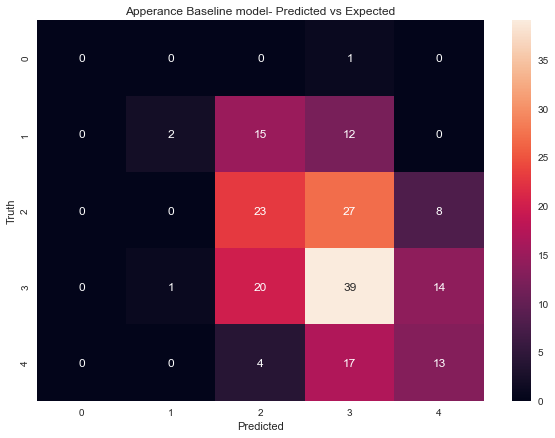

In [422]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Apperance Baseline model- Predicted vs Expected')
#plt.savefig("appearanceheatmap.png")
plt.show()

## Feature Selection

In [354]:
from sklearn.feature_selection import RFECV

model = LogisticRegression()
trans = RFECV(model)
logistic_X_trans = trans.fit_transform(X_train, y_train)
columns_retained_RFECV = appearance_questions.iloc[:, 1:].columns[trans.get_support()].values

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

IndexError: boolean index did not match indexed array along dimension 0; dimension is 139 but corresponding boolean dimension is 6

In [355]:
columns_retained_RFECV

array(['Science and technology', 'Hypochondria', 'Cheating in school',
       'Achievements', 'Personality', 'Spending on looks'], dtype=object)

In [423]:
RFECV_personality = personality_questions[['Science and technology', 'Hypochondria', 'Cheating in school',
       'Achievements', 'Personality', 'Spending on looks', 'Appearence and gestures']]

In [424]:
X_train, X_test, y_train, y_test = train_test_split(RFECV_personality.drop(['Appearence and gestures'], axis='columns'),
                                                    RFECV_personality['Appearence and gestures'], 
                                                    test_size=0.2)

In [425]:
RFECVmodel = LogisticRegression()

In [426]:
RFECVmodel.fit(X_train, y_train)

/Users/madisonkohls/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [383]:
RFECVmodel.score(X_test, y_test)

0.46938775510204084

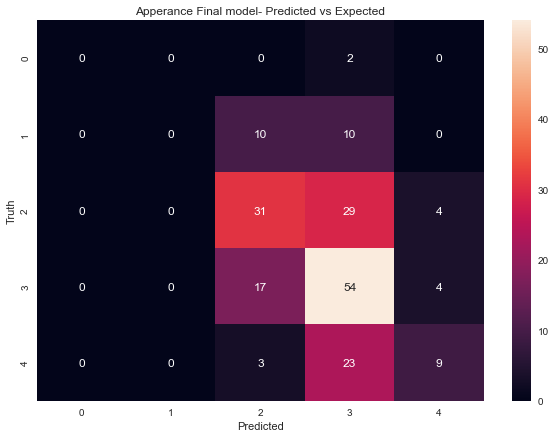

In [428]:
y_predicted = RFECVmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Apperance Final model- Predicted vs Expected')
#plt.savefig("appearanceheatmap2.png")
plt.show()

There was a 7% increase in predicting how one values their appearance, giving the model only 46% accuracy.